In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1.彩色图片直方图

In [2]:
def ImageHist(image, type):
    color = (255, 255, 255)
    windowName = 'Gary'
    if type == 31:
        color = (255, 0, 0)
        windowName = 'B hist'
    if type == 32:
        color = (0, 255, 0)
        windowName = 'G hist'
    if type == 33:
        color = (0, 0, 255)
        windowName = 'R hist'
        
    hist = cv2.calcHist([image], [0], None, [256], [0.0, 255.0])
    minV, maxV, minL, maxL = cv2.minMaxLoc(hist)
    histImage = np.zeros([256, 256, 3], np.uint8)
    for h in range(256):
        intenNormal = int(hist[h] * 256 / maxV)
        cv2.line(histImage, (h, 256), (h, 256 - intenNormal), color)
    cv2.imshow(windowName, histImage)
    return histImage

img = cv2.imread("img/image.jpg", 1)
channels = cv2.split(img) # BGR ==>B, G, R
for i in range(0, 3):
    ImageHist(channels[i], 31+i)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 彩色直方图源码
- 本质：统计每个像素 出现的概率：0~255，P

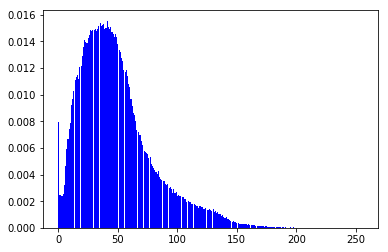

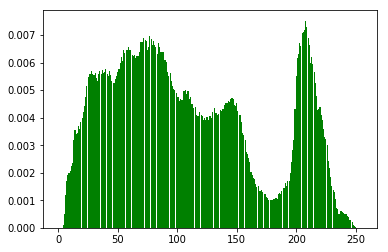

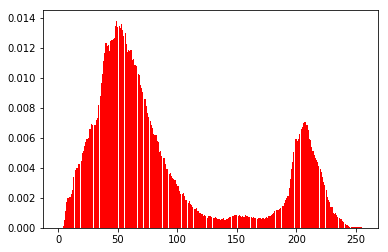

In [3]:
img = cv2.imread("img/image.jpg", 1)
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]

count_b = np.zeros(256, np.float)
count_g = np.zeros(256, np.float)
count_r = np.zeros(256, np.float)
for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b] + 1
        count_g[index_g] = count_g[index_g] + 1
        count_r[index_r] = count_r[index_r] + 1
        
for i in range(0, 256):
    count_b[i] = count_b[i] / (height * width)
    count_g[i] = count_g[i] / (height * width)
    count_r[i] = count_r[i] / (height * width)
    
x = np.linspace(0, 255, 256)
y1 = count_b
plt.figure()
plt.bar(x, y1, 0.9, alpha=1, color='b')

y2 = count_g
plt.figure()
plt.bar(x, y2, 0.9, alpha=1, color='g')

y3 = count_r
plt.figure()
plt.bar(x, y3, 0.9, alpha=1, color='r')
plt.show()

### 灰度直方图源码
- 本质：统计每个像素灰度 出现的概率：0~255，P

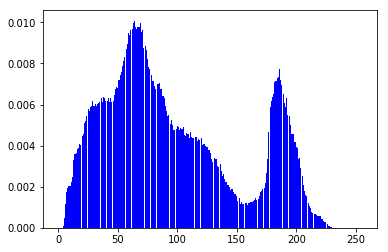

In [4]:
img = cv2.imread("img/image.jpg", 1)
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
count = np.zeros(256, np.float)
for i in range(0, height):
    for j in range(0, width):
        pixel = gray[i, j]
        index = int(pixel)
        count[index] = count[index] + 1
for i in range(0, 256):
    count[i] = count[i] / (height * width)

x = np.linspace(0, 255, 256)
y = count
plt.bar(x, y, 0.9, alpha=1, color='b')
plt.show()

## 2.直方图均衡化

- 灰度图

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst_equalizeHist = cv2.equalizeHist(gray)
cv2.imshow("dst_equalizeHist", dst_equalizeHist)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 灰度直方图均衡化

In [10]:
img = cv2.imread("img/image.jpg", 1)
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
count = np.zeros(256, np.float)
for i in range(0, height):
    for j in range(0, width):
        pixel = gray[i, j]
        index = int(pixel)
        count[index] = count[index] + 1
for i in range(0, 256):
    count[i] = count[i] / (height * width)

# 计算累计概率
sum1 = float(0)
for i in range(0, 256):
    sum1 = sum1 + count[i]
    count[i] = sum1

#计算映射表
map1 = np.zeros(256, np.uint16)
for i in range(0, 256):
    map1[i] = np.uint16(count[i] * 255)
#映射
for i in range(0, height):
    for j in range(width):
        pixel = gray[i, j]
        gray[i, j] = map1[pixel]
        
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 彩色图

In [6]:
(b, g, r) = cv2.split(img) #通道分解
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
result = cv2.merge((bH, gH, rH)) #通道合成
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

- YUV

In [7]:
imgYUV = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
channelYUV = cv2.split(imgYUV)
channelYUV[0] = cv2.equalizeHist(channelYUV[0])
channels2 = cv2.merge(channelYUV)
result2 = cv2.cvtColor(channels2, cv2.COLOR_YCrCb2BGR)
cv2.imshow("result", result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.图片修补

In [8]:
for i in range(200, 300):
    img[i, 200] = (255, 255, 255)
    img[i, 200+1] = (255, 255, 255)
    img[i, 200-1] = (255, 255, 255)
    
for i in range(150,250):
    img[250,i] = (255, 255, 255)
    img[250+1, i] = (255, 255, 255)
    img[250-1, i] = (255, 255, 255)

cv2.imwrite("img/damage.jpg", img)
cv2.imshow("img/damage.jpg", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
damageImg = cv2.imread("img/damage.jpg", 1)
damageImgShape = damageImg.shape
height = damageImgShape[0]
width = damageImgShape[1]

paint = np.zeros((height, width, 1), np.uint8)

for i in range(200, 300):
    paint[i, 200] = 255
    paint[i, 200+1] = 255
    paint[i, 200-1] = 255
    
for i in range(150,250):
    paint[250,i] = 255
    paint[250+1, i] = 255
    paint[250-1, i] = 255
    
imgDst = cv2.inpaint(img, paint, 3, cv2.INPAINT_TELEA)
cv2.imshow("paint", paint)
cv2.imshow("imgDst", imgDst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4.亮度增强

In [13]:
img = cv2.imread("img/image.jpg", 1)
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]

dst_img = np.zeros((height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        bb = int(b) + 40
        gg = int(g) + 40
        rr = int(r) + 40
        
        if bb > 255:
            bb = 255
        if gg > 255:
            gg = 255     
        if rr > 255:
            rr = 255
        dst_img[i, j] = (bb, gg, rr)

cv2.imshow("src_img", img)
cv2.imshow("dst_img", dst_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 5.磨皮美白
- 双边滤波

In [14]:
img = cv2.imread("img/1.png", 1)
dst = cv2.bilateralFilter(img, 15, 35, 35)
cv2.imshow("src", img)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6.高斯滤波

In [18]:
img = cv2.imread("img/image11.jpg", 1)
dst = cv2.GaussianBlur(img, (5, 5), 1.5)
cv2.imshow("src", img)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7.均值滤波

In [19]:
img = cv2.imread("img/image11.jpg", 1)
imgShape = img.shape
height = imgShape[0]
width = imgShape[1]

dst_img = np.zeros((height, width, 3), np.uint8)
for i in range(3, height-3):
    for j in range(3, width-3):
        sum_b = int(0)
        sum_g = int(0)
        sum_r = int(0)
        for m in range(-3, 3): #-3 -2 -1 0 1 2
            for n in range(-3, 3):
                (b, g, r) = img[i+m,j+n]
                sum_b = sum_b + int(b)
                sum_g = sum_g + int(g)
                sum_r = sum_r + int(r)
                
        b = np.uint8(sum_b/36)
        g = np.uint8(sum_g/36)
        r = np.uint8(sum_r/36)
        dst_img[i,j] = (b,g,r)
        
cv2.imshow("src", img)
cv2.imshow("dst_img", dst_img)
cv2.waitKey(0)
cv2.destroyAllWindows()